In [79]:
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
  
)


In [80]:
df=pd.read_csv('../DataSets/heart.csv')

In [81]:

numerical_features_df = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
categorical_features_df = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']]


In [82]:
#removing duplicates
print("Shape of the DataFrame before dropping duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Shape of the DataFrame after dropping duplicates:", df.shape)

Shape of the DataFrame before dropping duplicates: (303, 14)
Shape of the DataFrame after dropping duplicates: (302, 14)


In [83]:
#replacing outliers
def replace_outliers_with_nulls(data, columns):
    df_copy = data.copy()
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Replace only outlier cells with NaN
        df_copy.loc[(df_copy[col] < lower_limit) | (df_copy[col] > upper_limit), col] = np.nan
    return df_copy

#replace the outlires by nulls
df_clean = replace_outliers_with_nulls(df, numerical_features_df)

In [84]:
#fill the outliers by mean
df_filled = df_clean.fillna(df_clean.mean())


In [69]:
print(df_filled.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [70]:


# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform only the numerical columns
scaled_values = scaler.fit_transform(df_filled[numerical_cols])

# Create a new DataFrame with the same index and column names
numerical_features_df = pd.DataFrame(scaled_values,
                                     columns=numerical_cols,
                                     index=df_filled.index)

df_filled[numerical_cols] = numerical_features_df[numerical_cols]

display(df_filled.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.671053,0.457265,1,0,0.543860,0,0.575,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,0.875,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,0.350,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.200,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.150,2,0,2,1


In [86]:
X = df_filled.drop("target", axis=1)
y = df_filled["target"]

In [87]:
# Preprocessing pipelines
# numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first',
                                        sparse_output=False  )  # drop first to avoid dummy trap

preprocessor = ColumnTransformer(
    transformers=[
         ("num", "passthrough", numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [88]:
model = Pipeline([
    ('preprocess', preprocessor),
    ('nb', GaussianNB())
])

In [74]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# print("Original dataset shape:", X.shape, y.shape)
# print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [90]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [91]:
#evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8524590163934426



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Accuracy: 0.8524590163934426


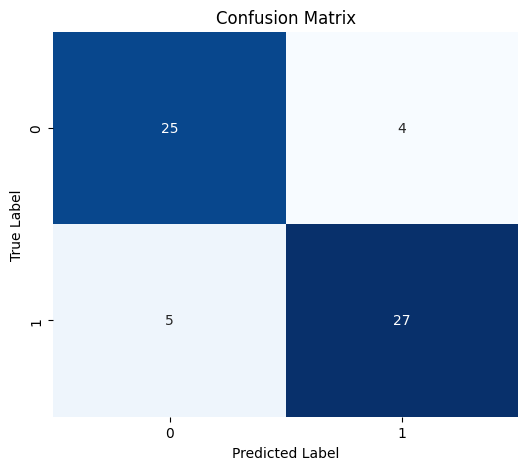

In [92]:
from sklearn.metrics import classification_report
#evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Accuracy: 0.8524590163934426

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



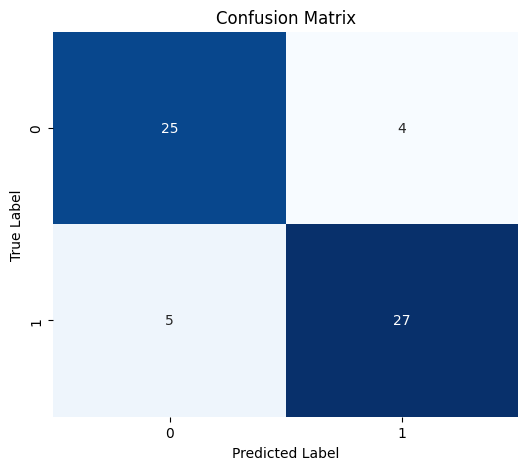

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../DataSets/heart.csv')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Replace outliers with NaN
def replace_outliers_with_nulls(data, columns):
    df_copy = data.copy()
    for col in columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df_copy.loc[(df_copy[col] < lower_limit) | (df_copy[col] > upper_limit), col] = np.nan
    return df_copy

numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

df_clean = replace_outliers_with_nulls(df, numerical_cols)
df_filled = df_clean.fillna(df_clean.mean())

# Scale numerical features
scaler = MinMaxScaler()
df_filled[numerical_cols] = scaler.fit_transform(df_filled[numerical_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = encoder.fit_transform(df_filled[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols), index=df_filled.index)

# Combine numerical and categorical features
X = pd.concat([df_filled[numerical_cols], encoded_cat_df], axis=1)
y = df_filled['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
